In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [33]:
d1 = pd.read_csv('DATA.csv')
req_col = [ "photon height", "latitude"]
print(d1[req_col].head())
# Standardize the features
z = StandardScaler()
d1[["photon height","latitude"]] = z.fit_transform(d1[["photon height","latitude"]])
print(d1[["photon height","latitude"]].head())

   photon height   latitude
0      398.14233  27.228242
1      391.40497  27.228248
2      391.65402  27.228248
3      391.85645  27.228248
4      391.81010  27.228254
   photon height  latitude
0       0.762227 -1.922833
1      -0.178431 -1.919921
2      -0.143659 -1.919919
3      -0.115396 -1.919918
4      -0.121867 -1.916966


In [34]:
# Update the labels in the DataFrame
d1["assignments"] = db1.labels_


   photon height  latitude
0       0.762227 -1.922833
1      -0.178431 -1.919921
2      -0.143659 -1.919919
3      -0.115396 -1.919918
4      -0.121867 -1.916966


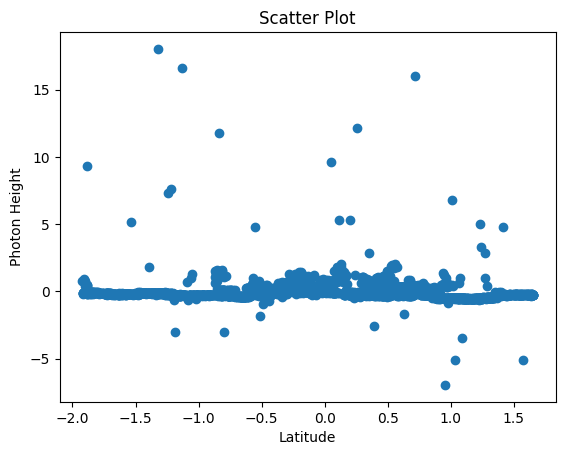

In [35]:
# Standardize the features
z = StandardScaler()
d1[["photon height","latitude"]] = z.fit_transform(d1[["photon height","latitude"]])
print(d1[["photon height","latitude"]].head())

plt.scatter(d1["latitude"], d1["photon height"])
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("Scatter Plot")
plt.show()


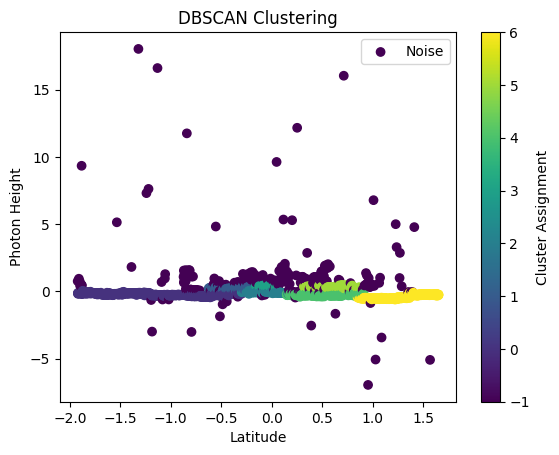

In [36]:
# DBSCAN and plots
db1 = DBSCAN(eps=0.1, min_samples=25).fit(d1)
labsList = ["Noise"] + ["Cluster" + str(i) for i in range(1, len(set(db1.labels_)))]

plt.scatter(d1["latitude"], d1["photon height"], c=db1.labels_)
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Assignment")
plt.legend(labsList)
plt.show()

In [37]:
# Select clustered data points for silhouette score calculation
d1_clustered = d1.loc[d1['assignments'] >= 0]

# Check if there are at least two unique labels in the clustered data
unique_labels = d1_clustered["assignments"].unique()
if len(unique_labels) < 2:
    print("Insufficient number of labels for silhouette score calculation.")
else:
    # Calculate the silhouette score for clustered data points
    silhouette = silhouette_score(d1_clustered[["latitude", "photon height"]], d1_clustered["assignments"])
    print("Silhouette Score for Clustered Data Points:", silhouette)

# Calculate the overall silhouette score for the dataset
silhouette_overall = silhouette_score(d1[["latitude", "photon height"]], d1["assignments"])
print("Overall Silhouette Score:", silhouette_overall)

Silhouette Score for Clustered Data Points: 0.513349617900965
Overall Silhouette Score: 0.378512038956529
